**With two features that is Age and EstimatedSalary we try to predict if the customer purchased the Ad and try to make some analysis out of our data**




# **Importing** **libraries**


---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
sns.set()

# Reading CSV files

In [2]:
df=pd.read_csv('Social_Network_Ads.csv', encoding= 'unicode_escape')

In [5]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
 df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
df.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


<AxesSubplot:>

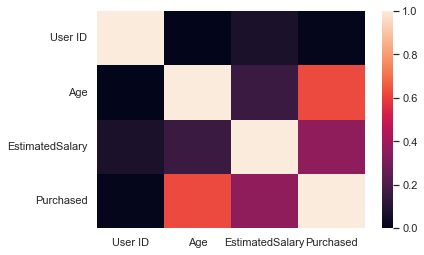

In [9]:
sns.heatmap(df.corr())

<AxesSubplot:xlabel='Age', ylabel='Count'>

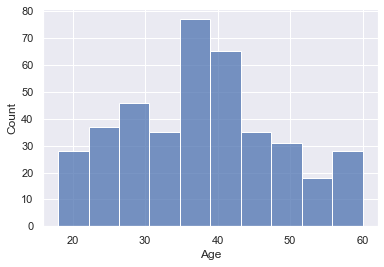

In [14]:
sns.histplot(df['Age'])

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

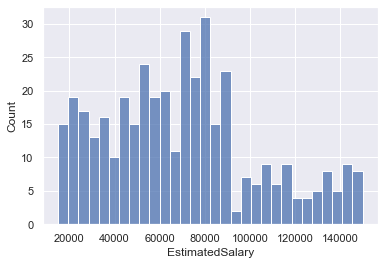

In [15]:
sns.histplot(df['EstimatedSalary'],bins=30)

C:\Users\mayur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

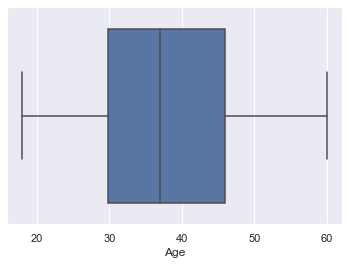

In [27]:
sns.boxplot(df['Age'])

C:\Users\mayur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EstimatedSalary'>

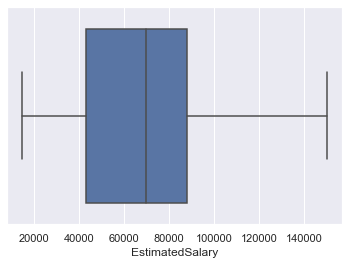

In [29]:
sns.boxplot(df['EstimatedSalary'])

In [20]:
df.drop(['User ID','Gender'],axis=1,inplace=True)

In [21]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [22]:
x=df.drop('Purchased',axis=1)
y=df['Purchased']

# scaling data and spliting for training and testing

In [ ]:
sc= StandardScaler()
sc.fit(x)
tran=sc.transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

# Building classification models

# 1. Logistic regression :




In [ ]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
lg_pred = lg.predict(x_test)
print(metrics.confusion_matrix(lg_pred,y_test))
print("Accuracy score:",metrics.accuracy_score(lg_pred,y_test))


[[77 43]
 [ 0  0]]
Accuracy score: 0.6416666666666667


# 2. k-nearest neighbors

Text(0, 0.5, 'Error Rate')

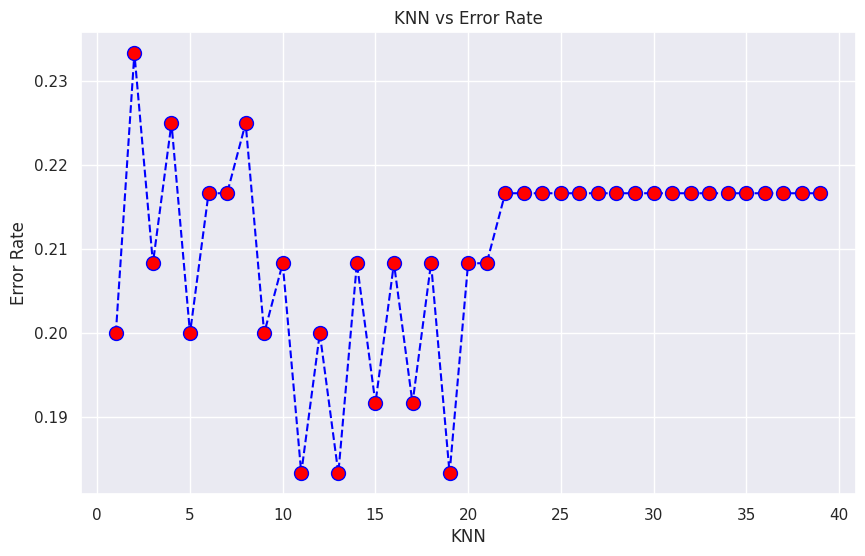

In [ ]:
k=[]
for i in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_i=knn.predict(x_test)
  k.append( np.mean( pred_i != y_test ))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),k,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize='10')
plt.title('KNN vs Error Rate')
plt.xlabel('KNN')
plt.ylabel('Error Rate')

In [ ]:
a=KNeighborsClassifier(n_neighbors=11)
a.fit(x_train,y_train)
a_pred=a.predict(x_test)
print(metrics.confusion_matrix(y_test,a_pred))
print(metrics.classification_report(y_test,a_pred))
print("Accuracy score:",metrics.accuracy_score(y_test,a_pred))

[[74  3]
 [19 24]]
              precision    recall  f1-score   support

           0       0.80      0.96      0.87        77
           1       0.89      0.56      0.69        43

    accuracy                           0.82       120
   macro avg       0.84      0.76      0.78       120
weighted avg       0.83      0.82      0.80       120

Accuracy score: 0.8166666666666667


# 3. Decision Tree:

In [ ]:
dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred =dt.predict(x_test)
print(metrics.confusion_matrix(y_test,dt_pred))
print('Accuracy Score:',metrics.accuracy_score(y_test,dt_pred))
print(metrics.classification_report(y_test,dt_pred))

[[70  7]
 [ 9 34]]
Accuracy Score: 0.8666666666666667
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        77
           1       0.83      0.79      0.81        43

    accuracy                           0.87       120
   macro avg       0.86      0.85      0.85       120
weighted avg       0.87      0.87      0.87       120



# 4. Random Forest:

In [ ]:
rf =RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
rf_pred= rf.predict(x_test)
print(metrics.confusion_matrix(y_test,rf_pred))
print('Accuracy score:',metrics.accuracy_score(y_test,rf_pred))
print(metrics.classification_report(y_test,rf_pred))

[[72  5]
 [ 7 36]]
Accuracy score: 0.9
              precision    recall  f1-score   support

           0       0.91      0.94      0.92        77
           1       0.88      0.84      0.86        43

    accuracy                           0.90       120
   macro avg       0.89      0.89      0.89       120
weighted avg       0.90      0.90      0.90       120



# 5. SVM (Support Vector Machine):

In [ ]:
svm=SVC()
svm.fit(x_train,y_train)
svm_pred= svm.predict(x_test)
print(metrics.confusion_matrix(y_test,svm_pred))
print(metrics.classification_report(y_test,svm_pred))
print("Accuracy score:",metrics.accuracy_score(y_test,svm_pred))

[[74  3]
 [29 14]]
              precision    recall  f1-score   support

           0       0.72      0.96      0.82        77
           1       0.82      0.33      0.47        43

    accuracy                           0.73       120
   macro avg       0.77      0.64      0.64       120
weighted avg       0.76      0.73      0.69       120

Accuracy score: 0.7333333333333333


---

## Random forest accuarcy score upto 0.9,so random forest algorithm is recommended

---

